### Step 3. 위 2단계의 데이터셋을 기반으로 딥러닝을 위한 데이터 분석 및 시각화
###### 제출된 파일에는 아래의 내용이 포함되어야 합니다.
1) pandas, matplotlib, seaborn 등과 같은 라이브러리를 사용하여 필요 시 데이터를 가공하여 분석 및 시각화를 수행한 소스 코드
2) 소스 코드를 이해하기 쉽게 작성한 Markdown을 이용한 주석문

In [10]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment',  None)
csvs = ["발라드", "랩힙합", "트로트", "CCM"]

### csv 읽어오기

2_Origin Dataset.csv 파일을 만들 때 (번호, 곡 제목, 곡 가사, 장르) 형태로 만들어 저장하였습니다.

In [11]:
data = pd.read_csv("2_Origin Dataset.csv")

In [12]:
data

,Unnamed: 0,name,lyrics,genre
0,0,미운 밤,"늦은 밤 내 품에 안기던 네가 기억나\n참 따스했었고, 참 놀라웠어\n이젠 없지만\...",발라드
1,1,아픔의나이,울고 그런 것\n하나도 모른 채\n스물의 절반을\n살아는 왔네요\n이러나저러나\n시...,발라드
2,2,Forever & Forever (다시 우리 만나면),I won’t ever forget\nabout the friendship that...,발라드
3,3,애태우나요,왜 날\n애태우나요\n사랑해 줄 것도 아니면서\n애태우나요\n잠시 머물다 또 사라질...,발라드
4,4,한번쯤,이젠 어쩌면\n살아갈 수 없겠죠\n작은 추억 하나도\n너무 아프겠죠\n그댄 오늘도\...,발라드
...,...,...,...,...
5804,5804,"내가 매일 기쁘게 (Feat. 박흥준, 정예원)",내가 매일 기쁘게 순례의 길 행함은\n주의 팔이 나를 나를 안보함이요\n주의 팔이 ...,CCM
5805,5805,영원한 꿈 (Feat. For his glory),매일 밤 꿈 속을 헤매었어\n혼자 무언갈 찾고 있었지\n너도 그래왔을 것 같아\n우...,CCM
5806,5806,새 힘 얻으리,새 힘 얻으리 주를 바랄 때\n주를 바랄 때 우리 주를 바랄 때\n새 힘 얻으리 주...,CCM
5807,5807,"예수님의 색 (Feat. 김은채, 전민영)",빨간색과 하얀색이 만나\n분홍빛깔 사랑 나눌까\n노랑색과 파랑색이 만나\n초록빛깔 ...,CCM


### 데이터 분석

#### 레이블에 따른 데이터 개수

In [13]:
print("전체 데이터 개수 :", len(data['genre']))
print('--------------------------')
print('장르에 따른 데이터 개수: ', data['genre'].value_counts(), sep='\n')

전체 데이터 개수 : 5809
--------------------------
장르에 따른 데이터 개수: 
트로트    1542
발라드    1493
CCM    1449
랩힙합    1325
Name: genre, dtype: int64


딥러닝 과정에서 해당 데이터의 수를 동일하게 맞출 예정입니다.

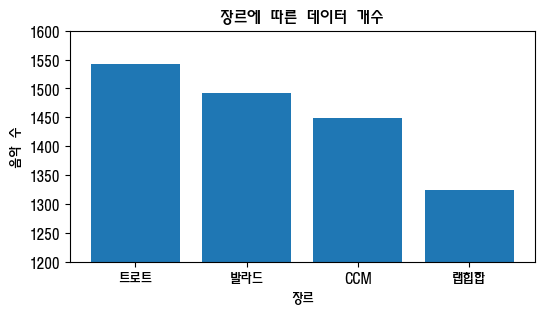

In [14]:
# 시각화
def get_number_of_genre(data) :
    font_location="c:/windows/fonts/HMFMMUEX.TTC" 
    font_name=fm.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font',family=font_name)
    plt.figure(figsize=(6,3))
    plt.xlabel('장르')
    plt.ylabel('음악 수')
    plt.ylim(1200, 1600)
    plt.title('장르에 따른 데이터 개수')
    plt.bar(data['genre'].value_counts().keys(), data['genre'].value_counts())
    plt.show()

get_number_of_genre(data)

#### 가사 분석 하기 전 가사 데이터 정제

분석 하기에 앞서 다음과 같은 방법을 이용해 정제했습니다.
1. 줄바꿈 기호 제거
2. 한글 단어가 아닌 단어 제거 (특수문자, 영어 등)
3. 빈 문자열 있는지 확인 및 제거
4. 결측값 확인

줄바꿈 기호 제거 단게와 한글 단어가 아닌 단어 제거 단계에서 대표적인 예시 가사 하나를 뽑아 보여주도록 하였습니다.

In [15]:
# 줄바꿈 기호 제거
print("[줄바꿈 제거 전]\n" + data['lyrics'][0])
for i in range(len(data['lyrics'])) :
    t = data['lyrics'][i].replace('\n', ' ')
    data['lyrics'][i] = t
print("\n[줄바꿈 제거 후]\n" + data['lyrics'][0])

[줄바꿈 제거 전]
늦은 밤 내 품에 안기던 네가 기억나
참 따스했었고, 참 놀라웠어
이젠 없지만
조금은 궁금해
나 없는 하루에 내 흔적 남았는지
아직 난 너 없는 세상에
남아서 바보처럼 살고 있는데
괜찮아 보여서 미운 밤
슬픈 밤 너 때문에
너무 아픈데 넌 아닌가 봐
혼자 하는 이별이라 그런가 봐
날 보며 미소를 지었던
네가 자꾸 보고 싶은 밤
영화처럼 널 마주친 다면
고마웠다고 미안하다 말해줄게
솔직히 말할게
혼자인 시간은 아직도 무서운데
오늘도 너 없는 세상에
버려진 사람처럼 살고 있는데
괜찮아 보여서 미운 밤
슬픈 밤 너 때문에
너무 아픈데 넌 아닌가 봐
혼자 하는 이별이라 그런가 봐
날 보며 미소를 지었던
네가 자꾸 보고 싶은 밤
영화처럼 널 마주친 다면
고마웠다고 미안하다 말해줄게
우린 힘들게 사랑했고
우린 허무한 이별을 맞고
너를 생각하고, 나를 생각하면
멈춰야 한다는 걸
눈물이 차올라 미운 밤
아니 미친 밤 너 때문에
보고 싶어서 네가 그리워서
바보같이 돌아오길 기다렸어
차라리 이별이 맞다며
널 보냈던 후회되는 밤
영원하자 약속했는데
지키지 못해 미안했어

[줄바꿈 제거 후]
늦은 밤 내 품에 안기던 네가 기억나 참 따스했었고, 참 놀라웠어 이젠 없지만 조금은 궁금해 나 없는 하루에 내 흔적 남았는지 아직 난 너 없는 세상에 남아서 바보처럼 살고 있는데 괜찮아 보여서 미운 밤 슬픈 밤 너 때문에 너무 아픈데 넌 아닌가 봐 혼자 하는 이별이라 그런가 봐 날 보며 미소를 지었던 네가 자꾸 보고 싶은 밤 영화처럼 널 마주친 다면 고마웠다고 미안하다 말해줄게 솔직히 말할게 혼자인 시간은 아직도 무서운데 오늘도 너 없는 세상에 버려진 사람처럼 살고 있는데 괜찮아 보여서 미운 밤 슬픈 밤 너 때문에 너무 아픈데 넌 아닌가 봐 혼자 하는 이별이라 그런가 봐 날 보며 미소를 지었던 네가 자꾸 보고 싶은 밤 영화처럼 널 마주친 다면 고마웠다고 미안하다 말해줄게 우린 힘들게 사랑했고 우린 허무한 이별을 맞고 너를 생각하고, 나를 생각하면 멈춰야 한다는 걸 눈물이 

In [16]:
# 한글 아닌 단어 제거
print("[한글 아닌 단어 제거 전]\n" + data['lyrics'][2494])
for i in range(len(data['lyrics'])) :
    t = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]',"", data['lyrics'][i])
    data['lyrics'][i] = t
print("\n[한글 아닌 단어 제거 후]\n" + data['lyrics'][2494])

[한글 아닌 단어 제거 전]
이새끼들 앞에선 아무말 못하고 뒤에서 아가리 파이터 내 눈보고 말할수 있으면 찾아와봐라 잡을게 라인업 아무도 용감한 사람이 없어 덤벼봐 내가 다이겨 제발 체급부터 키우고와라 everything here is minor 이새끼들 앞에선 아무말 못하고 뒤에서 아가리 파이터 내 눈보고 말할수 있으면 찾아와봐라 잡을게 라인업 아무도 용감한 사람이 없어 덤벼봐 내가 다이겨 제발 체급부터 키우고와라 everything here is minor 이새끼들 앞에선 아무말 못하고 뒤에서 아가리 파이터 내 눈보고 말할수 있으면 찾아와봐라 잡을게 라인업 아무도 용감한 사람이 없어 덤벼봐 내가 다이겨 제발 체급부터 키우고와라 everything here is minor I'm tryna keeping in my hand bust down bust down 눈똑바로 떠 넌 몰라 랩하는법을 그러니 제발 튠 똑바로 껴 아 진짜 여기 애들 랩하는거 못들어주겠어 비트 꺼 나 랩할때 내 심장좀 만져봐 아 진짜 개뜨거 I don't give a fuck it fuck it 어디 감히 나한테 말걸어 아무나 내 앞에오면 눈도 못보고 다 가살절어 니네 가사에 나오는 친구들 다 불러와바라 내 눈밑에 ice 처럼 다 얼어 얼어 얼어 얼어 날 원해 thotties 지쳤어 너 body 난 아니야 니 자기 제발좀 가지? 넌 누가봐도 만원따리 fuck 똥을싸지 나는 나니 너네말은 죽어도 안 듣지 like a Cardi B 난 party 하고싶은거는 다하지 Playboi Carti 이새끼들 앞에선 아무말 못하고 뒤에서 아가리 파이터 내 눈보고 말할수 있으면 찾아와봐라 잡을게 라인업 아무도 용감한 사람이 없어 덤벼봐 내가 다이겨 제발 체급부터 키우고와라 everything here is minor 이새끼들 앞에선 아무말 못하고 뒤에서 아가리 파이터 내 눈보고 말할수 있으면 찾아와봐라 잡을게 라인업 아무도 용감한 사람이 없어 덤벼봐 내가 다이겨 제발 체급부터 키우고와라 everything

위 정제 과정을 거친 후 값이 사라진 곡이 있는지 확인하고, 가사가 사라진 경우 그 곡을 삭제하는 과정입니다.

전체 곡 수 : 5809
제거할 곡 수 : 118
제거할 곡 번호 : [54, 61, 87, 112, 133, 134, 158, 179, 180, 187, 199, 213, 215, 234, 322, 336, 352, 489, 568, 591, 636, 671, 702, 775, 806, 935, 1019, 1060, 1100, 1148, 1193, 1195, 1251, 1261, 1306, 1323, 1382, 1396, 1557, 1586, 1598, 1671, 1675, 1694, 1799, 1842, 1857, 1862, 1884, 1906, 1922, 1980, 1995, 2045, 2049, 2051, 2145, 2164, 2236, 2282, 2317, 2410, 2429, 2451, 2499, 2506, 2611, 2652, 2727, 2752, 2780, 3650, 3677, 4379, 4394, 4410, 4433, 4478, 4741, 4742, 4763, 4766, 4814, 4856, 4900, 4912, 4936, 4965, 5013, 5082, 5091, 5110, 5154, 5156, 5191, 5204, 5213, 5232, 5240, 5264, 5270, 5290, 5296, 5299, 5344, 5354, 5367, 5369, 5561, 5562, 5583, 5586, 5634, 5676, 5720, 5732, 5756, 5785]
--------------------------
--------제거 완료---------
--------------------------
전체 데이터 개수 : 5691
--------------------------
------바뀐 데이터셋-------
--------------------------
장르에 따른 데이터 개수: 
트로트    1540
발라드    1455
CCM    1404
랩힙합    1292
Name: genre, dtype: int64


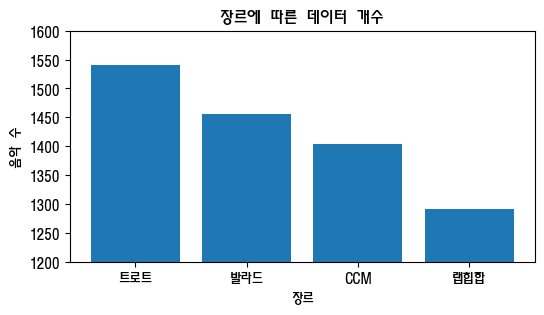

In [17]:
# 빈 문자열 확인
array = []
for l in data['lyrics'] :
    array.append(l.replace(' ', ''))
delete_ly = [i for i, sentence in enumerate(array) if len(sentence) < 1]
print("전체 곡 수 :", len(data['lyrics']))
print("제거할 곡 수 :", len(delete_ly))
print("제거할 곡 번호 :", delete_ly)

# 빈 문자열 제거
for l in delete_ly[::-1] :
    data['name'].pop(l)
    data['lyrics'].pop(l)
    data['genre'].pop(l)    
print('--------------------------')
print('--------제거 완료---------')
print('--------------------------')    
print("전체 데이터 개수 :", len(data['genre']))
print('--------------------------')
print('------바뀐 데이터셋-------')
print('--------------------------')
print('장르에 따른 데이터 개수: ', data['genre'].value_counts(), sep='\n')
get_number_of_genre(data)

In [18]:
print(len(data['name']))
print(len(data['lyrics']))
print(len(data['genre']))
a = data['name']
b = data['lyrics']
c = data['genre']
data = pd.DataFrame()
data['name'] = a
data['lyrics'] = b
data['genre'] = c

5691
5691
5691


In [19]:
# 결측값 확인
data.isnull().sum()

name      0
lyrics    0
genre     0
dtype: int64

#### 가사 길이 분석

In [20]:
t = 0
print('가사 평균 길이(전체) :',np.mean(data['lyrics'].str.len()))
print('------------------------------------------')
for i, n in enumerate(data['genre'].value_counts()) :
    print('가사 평균 길이('+csvs[i]+') :',np.mean(data['lyrics'][t:t+n].str.len()))
    t += n
    print(t)

가사 평균 길이(전체) : 474.62449481637674
------------------------------------------
가사 평균 길이(발라드) : 429.23896103896107
1540
가사 평균 길이(랩힙합) : 687.7257731958763
2995
가사 평균 길이(트로트) : 347.4209401709402
4399
가사 평균 길이(CCM) : 426.9659442724458
5691


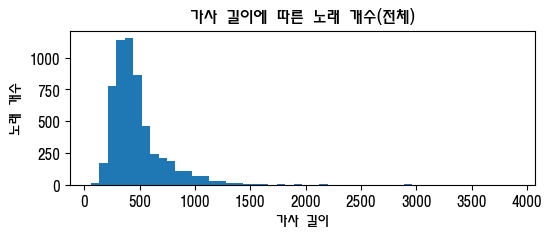

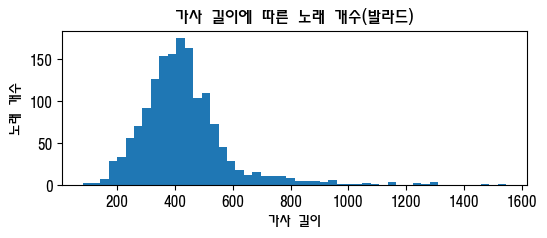

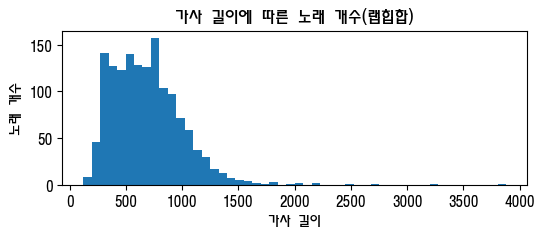

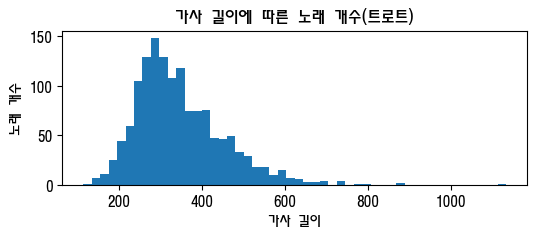

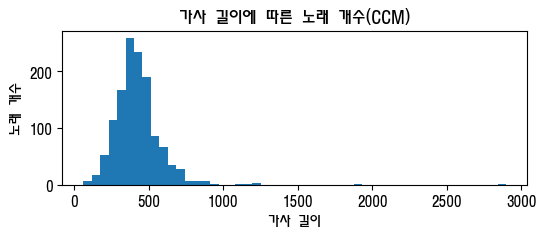

In [21]:
plt.figure(figsize=(6,2))
plt.title('가사 길이에 따른 노래 개수(전체)')
plt.xlabel('가사 길이')
plt.ylabel('노래 개수')
plt.hist([len(review) for review in data['lyrics']], bins=50)
plt.show()
t = 0
for i, n in enumerate(data['genre'].value_counts()) :
    plt.figure(figsize=(6,2))
    plt.title('가사 길이에 따른 노래 개수('+csvs[i]+')')
    plt.xlabel('가사 길이')
    plt.ylabel('노래 개수')
    plt.hist([len(review) for review in data['lyrics'][t:t+n]], bins=50)
    plt.show()
    t += n

In [22]:
def check_len_below_percent(len_val, lists): 
    # 가사 길이가 len_val 이하인 비율 출력
    count = 0
    for l in lists:
        if(len(l) <= len_val):
            count = count + 1
    print('길이가 '+str(len_val)+' 이하인 곡의 비율: ' + str((count / len(lists))*100) + "%")

check_len_below_percent(400, data['lyrics'])    
check_len_below_percent(450, data['lyrics'])    
check_len_below_percent(500, data['lyrics'])
check_len_below_percent(550, data['lyrics'])
check_len_below_percent(600, data['lyrics'])

길이가 400 이하인 곡의 비율: 46.45932173607451%
길이가 450 이하인 곡의 비율: 59.198734844491305%
길이가 500 이하인 곡의 비율: 69.24969249692496%
길이가 550 이하인 곡의 비율: 76.20804779476367%
길이가 600 이하인 곡의 비율: 80.82937972236866%


곡의 길이가 대부분 400에서 600에 위치하고 있고 이는 이후 토큰화를 하고 신경망 모델에 넣은 값의 길이를 정하는데 영향을 주게됩니다.

#### 가사 분석

워드클라우드와 빈도수 그래프를 이용하여 각 장르에 따른 단어 분포를 알아볼 것입니다. 또한 전체 장르에서 동시에 높은 비율을 차지하는 단어의 경우 분류 학습에서 큰 영향을 주지 않을 것이라 판단되어 지울 생각입니다.

In [26]:
from konlpy.tag import *
from collections import Counter
from wordcloud import WordCloud
from nltk.probability import FreqDist

# okt 돌려서 얻은 값을 반환하는 함수
# 시간이 많이 걸리는 작업이라 따로 값을 반환하는 함수를 만들어 사용이 용이하도록 하였습니다.
def make_noun_list(listss, stopwords) :
    noun_lists = []
    for o, lists in enumerate(listss) :
        okt = Okt() 
        kkma = Kkma( )
        result = ""
        for l in lists :
            result = result + " " + l
        words = [word for word in okt.nouns(result) if len(word) >1 and word not in stopwords]
        count = Counter(words)
        noun_list = count.most_common(100)
        noun_lists.append(noun_list)
    return noun_lists

# 워드클라우드 그려주는 함수
def make_wordcloud(noun_lists) :
    wcs = []
    font_location="c:/windows/fonts/HMFMMUEX.TTC"
    for o, noun_list in enumerate(noun_lists) :
        wc = WordCloud(font_path = font_location,
                        background_color = 'white',
                        width=512, height=512,
                        max_font_size=500,
                        max_words=1000)
        wc.generate_from_frequencies(dict(noun_list))
        wcs.append(wc)
    fig,ax = plt.subplots(2,2, figsize=(10,10))
    fig.tight_layout()
    for i in range(len(wcs)) :
        ax[i//2][i%2].imshow(wcs[i])
        ax[i//2][i%2].axis('off')
        ax[i//2][i%2].set_title(csvs[i])

# 빈도수 그래프 그려주는 함수
def make_graph(noun_lists) :
    font_location="c:/windows/fonts/HMFMMUEX.TTC"
    for o, noun_list in enumerate(noun_lists) :
        plt.figure(figsize=(10,3))
        final_okt_sort_dic_graph = FreqDist(dict(noun_list))
        plt.title(csvs[o] + ' 키워드 빈도수', fontsize=10)
        final_okt_sort_dic_graph.plot(20)
        plt.show()

# 빈도수가 높은 단어 중 겹치는 단어를 찾아내는 함수
# 모든 장르에서 높은 빈도수를 보이는 단어는 불용어(stopword)로 추천합니다.
def find_common_word(noun_lists) :
    noun_dict = {}
    stop_word_recommend = []
    for noun_list in noun_lists :
        for noun_val in noun_list[:10] :
            if noun_val[0] in noun_dict.keys() :
                noun_dict[noun_val[0]] += 1
            else :
                noun_dict[noun_val[0]] = 1
    for i in noun_dict :
        if noun_dict[i] == len(csvs) :
            stop_word_recommend.append(i)
    return stop_word_recommend

t = 0
genre_list = []
stopwords = []
for i, n in enumerate(data['genre'].value_counts()) :
    genre_list.append(data['lyrics'][t:t+n])
    t += n
noun_lists = make_noun_list(genre_list, stopwords)

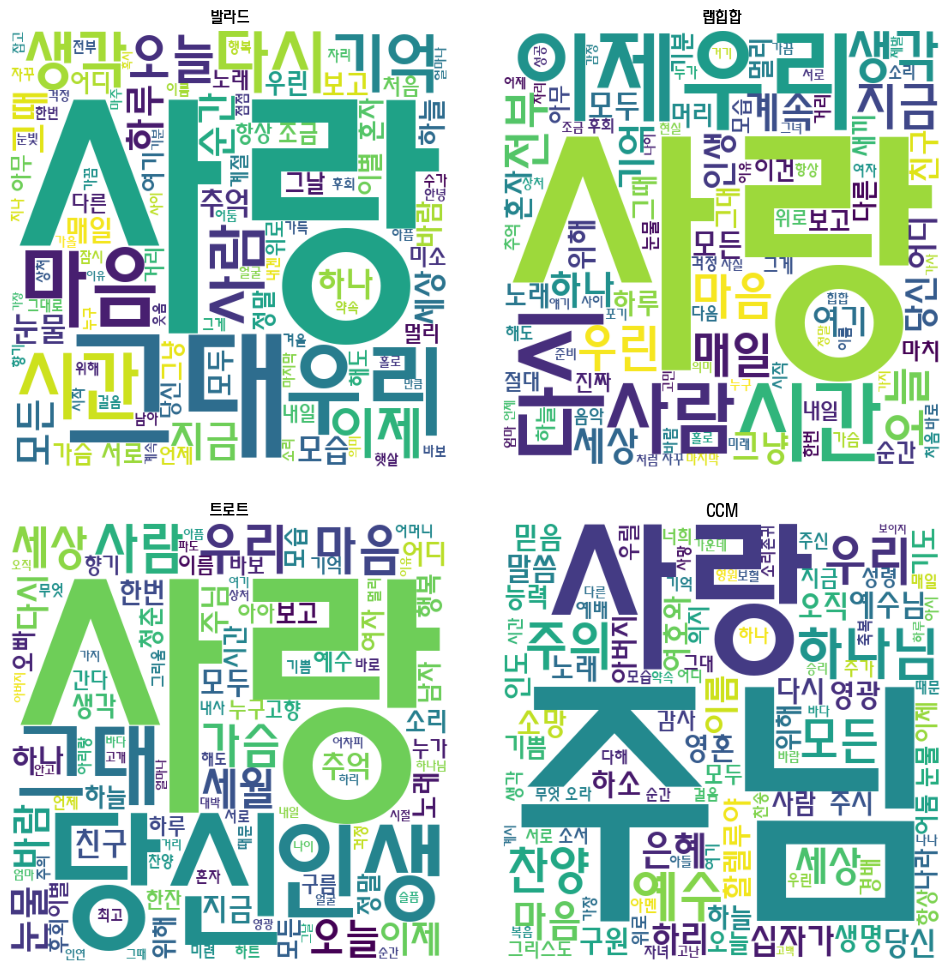

In [27]:
# 워드클라우드
make_wordcloud(noun_lists)

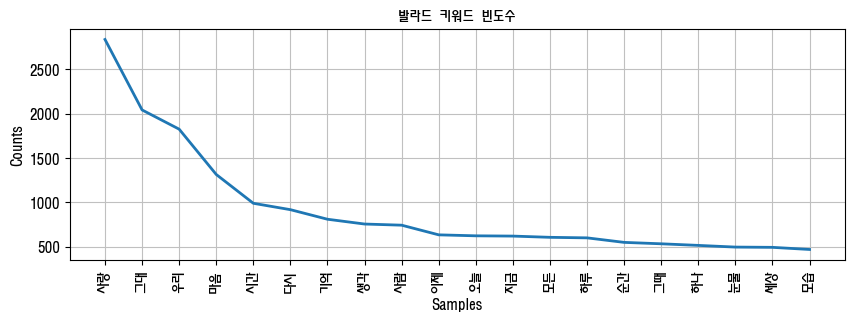

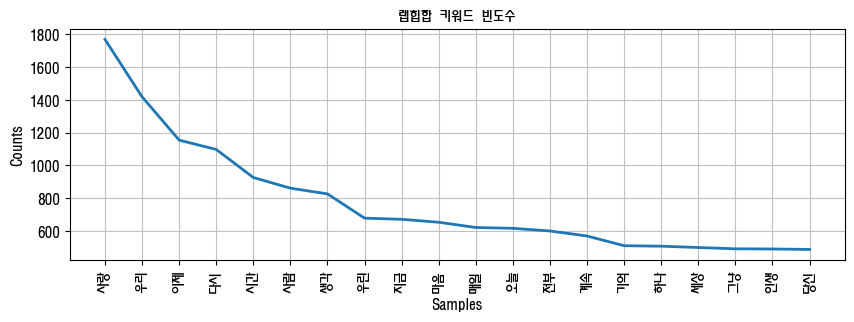

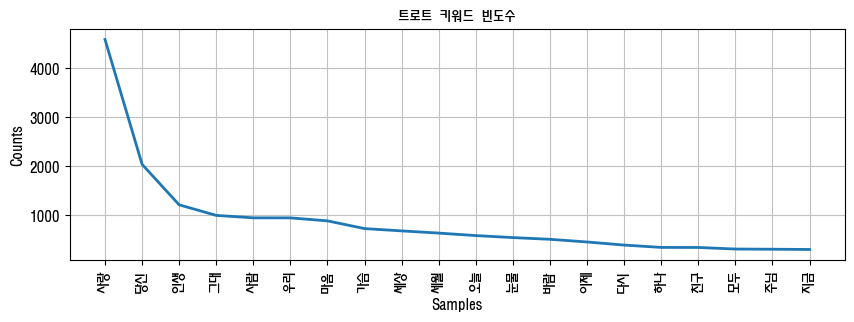

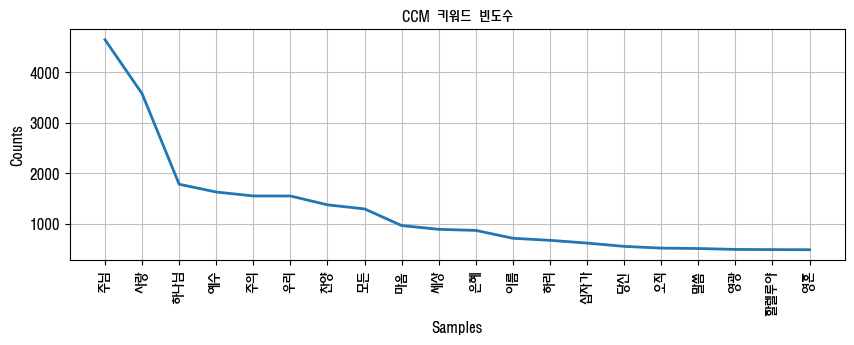

In [28]:
# 빈도수 그래프
make_graph(noun_lists)

In [29]:
stopwords = find_common_word(noun_lists)
print("불용어 추천 :", stopwords)

불용어 추천 : ['사랑', '우리', '마음']


다음은 불용어를 제거한 이후 워드 클라우드를 나타낸 것입니다.

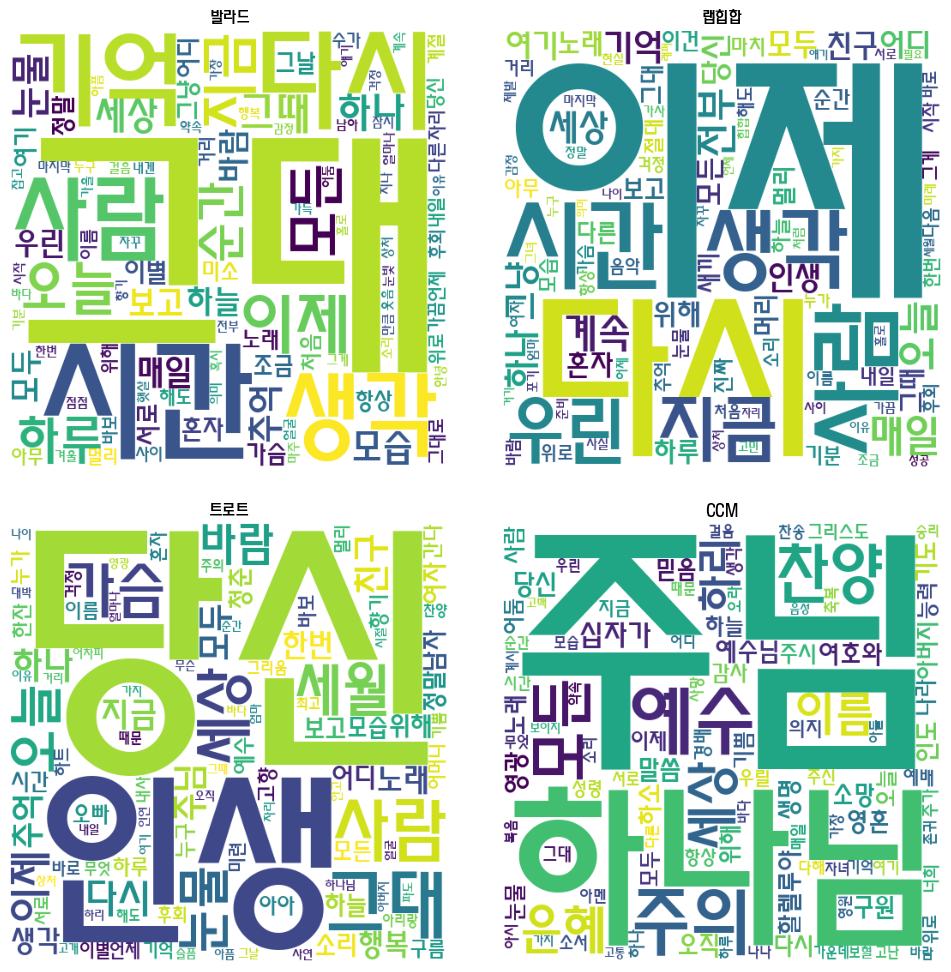

In [30]:
noun_lists = make_noun_list(genre_list, stopwords)
make_wordcloud(noun_lists)

워드 클라우드와 그래프를 근거로 가사를 이용한 네 장르의 분류가 가능할 것이라 생각합니다.